#This notebook is for testing tf-idf and cossine similarity as a method to do movies recommendations. The objective is to test use this as a starting point and first approach because its simple and fast, after that we could use AWS Personalize, Deep Learning-NLP techniques and other methods

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
df =pd.read_csv ('/content/drive/MyDrive/Data Science & ML & IA/NLP/bbc_text_cls.csv')

In [5]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [7]:
#populate word2idx
#convert documents into seqences of ints /ids /indices

idx =0
word2idx= {}
tokenized_docs= [] #iniciamos hasta aqui variables
for doc in df['text']: #recorremos los textos
  words = word_tokenize(doc.lower()) #tokenizamos los doc con valores en lower()
  doc_as_int = [] #
  for word in words:
    if word not in word2idx:
      word2idx[word]= idx
      idx+=1

      #save for later
      doc_as_int.append(word2idx[word])
      tokenized_docs.append(doc_as_int)

In [8]:
#reverse mapping
#if you do it smarter you can store it as a list
idx2word = {v:k for k, v in word2idx.items()}

In [14]:
idx2word

{0: 'ad',
 1: 'sales',
 2: 'boost',
 3: 'time',
 4: 'warner',
 5: 'profit',
 6: 'quarterly',
 7: 'profits',
 8: 'at',
 9: 'us',
 10: 'media',
 11: 'giant',
 12: 'timewarner',
 13: 'jumped',
 14: '76',
 15: '%',
 16: 'to',
 17: '$',
 18: '1.13bn',
 19: '(',
 20: '£600m',
 21: ')',
 22: 'for',
 23: 'the',
 24: 'three',
 25: 'months',
 26: 'december',
 27: ',',
 28: 'from',
 29: '639m',
 30: 'year-earlier',
 31: '.',
 32: 'firm',
 33: 'which',
 34: 'is',
 35: 'now',
 36: 'one',
 37: 'of',
 38: 'biggest',
 39: 'investors',
 40: 'in',
 41: 'google',
 42: 'benefited',
 43: 'high-speed',
 44: 'internet',
 45: 'connections',
 46: 'and',
 47: 'higher',
 48: 'advert',
 49: 'said',
 50: 'fourth',
 51: 'quarter',
 52: 'rose',
 53: '2',
 54: '11.1bn',
 55: '10.9bn',
 56: 'its',
 57: 'were',
 58: 'buoyed',
 59: 'by',
 60: 'one-off',
 61: 'gains',
 62: 'offset',
 63: 'a',
 64: 'dip',
 65: 'bros',
 66: 'less',
 67: 'users',
 68: 'aol',
 69: 'on',
 70: 'friday',
 71: 'that',
 72: 'it',
 73: 'owns',
 74

In [9]:
#number of documents 
N = len(df['text'])

In [ ]:
#number of words 
N = len(df['text'])

In [11]:
import json

In [12]:
j = json.loads(x['genres'])
j

NameError: ignored

In [ ]:
' '.join(''.join(genres['name'].split()) for genres in j)

'Action Adventure Fantasy ScienceFiction'

In [ ]:
#convert the relevant data for each movie into a single string
# to be ingested by TfidfVectorizer
def convertir_a_str_una_fila(fila):
  genres = json.loads(fila['genres'])
  genres=' '.join(''.join(genre['name'].split()) for genre in genres)
  kws = json.loads(fila['keywords'])
  kws=' '.join(' '.join(kw['name'].split()) for kw in kws)
  return "%s %s" % (genres, kws)

In [ ]:
df['string'] = df.apply(convertir_a_str_una_fila, axis = 1)

In [ ]:
df['string'][0]

'Action Adventure Fantasy ScienceFiction culture clash future space war space colony society space travel futuristic romance space alien tribe alien planet cgi marine soldier battle love affair anti war power relations mind and soul 3d'

In [ ]:
#create a TfidfVectorizer object
tfidf = TfidfVectorizer(max_features = 2000) #leer mas de la funcion 

In [ ]:
#create a data matrix from overviews
X= tfidf.fit_transform(df['string'])

In [ ]:
X

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 54212 stored elements in Compressed Sparse Row format>

In [ ]:
#generate a mapping from movie title -> index (in df)
movie2index =pd.Series(df.index, index=df.title)
movie2index

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [ ]:
idx = movie2index['Scream 3']

In [ ]:
idx

1164

In [ ]:
query =X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [ ]:
#print the query vector
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#compute similarity between query and every vector in X

scores = cosine_similarity(query, X)
scores

array([[0.        , 0.02118016, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
#currently the array is 1xN, make it just a 1-D arra
scores = scores.flatten()

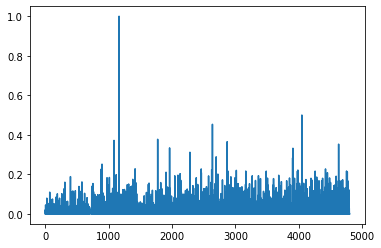

In [ ]:
plt.plot(scores) # vemos que hay un spike que llega a 1, eso es pq query es una pelicula del mismo listado y se compara a si misma

In [ ]:
(-scores).argsort() #orden de menor a mayor

array([1164, 4048, 2637, ..., 1886, 1870, 4802])

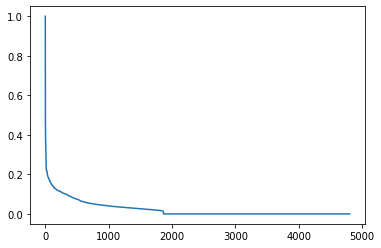

In [ ]:
plt.plot(scores[(-scores).argsort()])#no entiendo bien pq hay q filtrar scores con el orden...

In [ ]:
#get the top 5 matches
#exclude self (similarity between query and itself yields max score)
recommended_idx = (-scores).argsort()[1:6]

In [ ]:
recommended_idx

array([4048, 2637, 4053, 1773, 1084])

In [ ]:
#convert indices back to titles just to see them
df['title'].iloc[recommended_idx]

4048                         The Calling
2637                   Felicia's Journey
4053    Friday the 13th: A New Beginning
1773                         Mindhunters
1084                     The Glimmer Man
Name: title, dtype: object

In [ ]:
#create a function that generates recommendations

def recommend(title):
  #get the row in the dataframe for this movie
  idx = movie2index[title]
  print ("tu peli es la numero: ", idx)
  if type(idx) == pd.Series:
    idx = idx.iloc[0]
    #calculate the pairwise similarities for this movie
  query = X[idx]
  scores = cosine_similarity(query, X)

  #currently the array is 1 x N, make it just a 1-D array
  scores = scores.flatten()

  #get the indexes of the highest scoring movies
  #get the first K recomnendations
  #don't return itself!
  recommended_idx = (-scores).argsort()[1:6]

  #return the titles of recommendations
  return df['title'].iloc[recommended_idx]

In [ ]:
print ("Recommendations for Scream 3: ")
print(recommend('Scream 3'))

Recommendations for Scream 3: 
tu peli es la numero:  1164
4048                         The Calling
2637                   Felicia's Journey
4053    Friday the 13th: A New Beginning
1773                         Mindhunters
1084                     The Glimmer Man
Name: title, dtype: object


In [ ]:
print ("Recommendations for Scream 3: ")
print(recommend('Avatar'))

Recommendations for Scream 3: 
tu peli es la numero:  0
4332        Silent Running
838                 Alien³
2403                Aliens
3158                 Alien
278     Planet of the Apes
Name: title, dtype: object


In [ ]:
print ("Recommendations for Scream 3: ")
print(recommend('Titanic'))

Recommendations for Scream 3: 
tu peli es la numero:  25
1399               In Time
2677            Good Deeds
491                Pompeii
2925    A Walk to Remember
3170           Down to You
Name: title, dtype: object
